In [1]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='weight'>

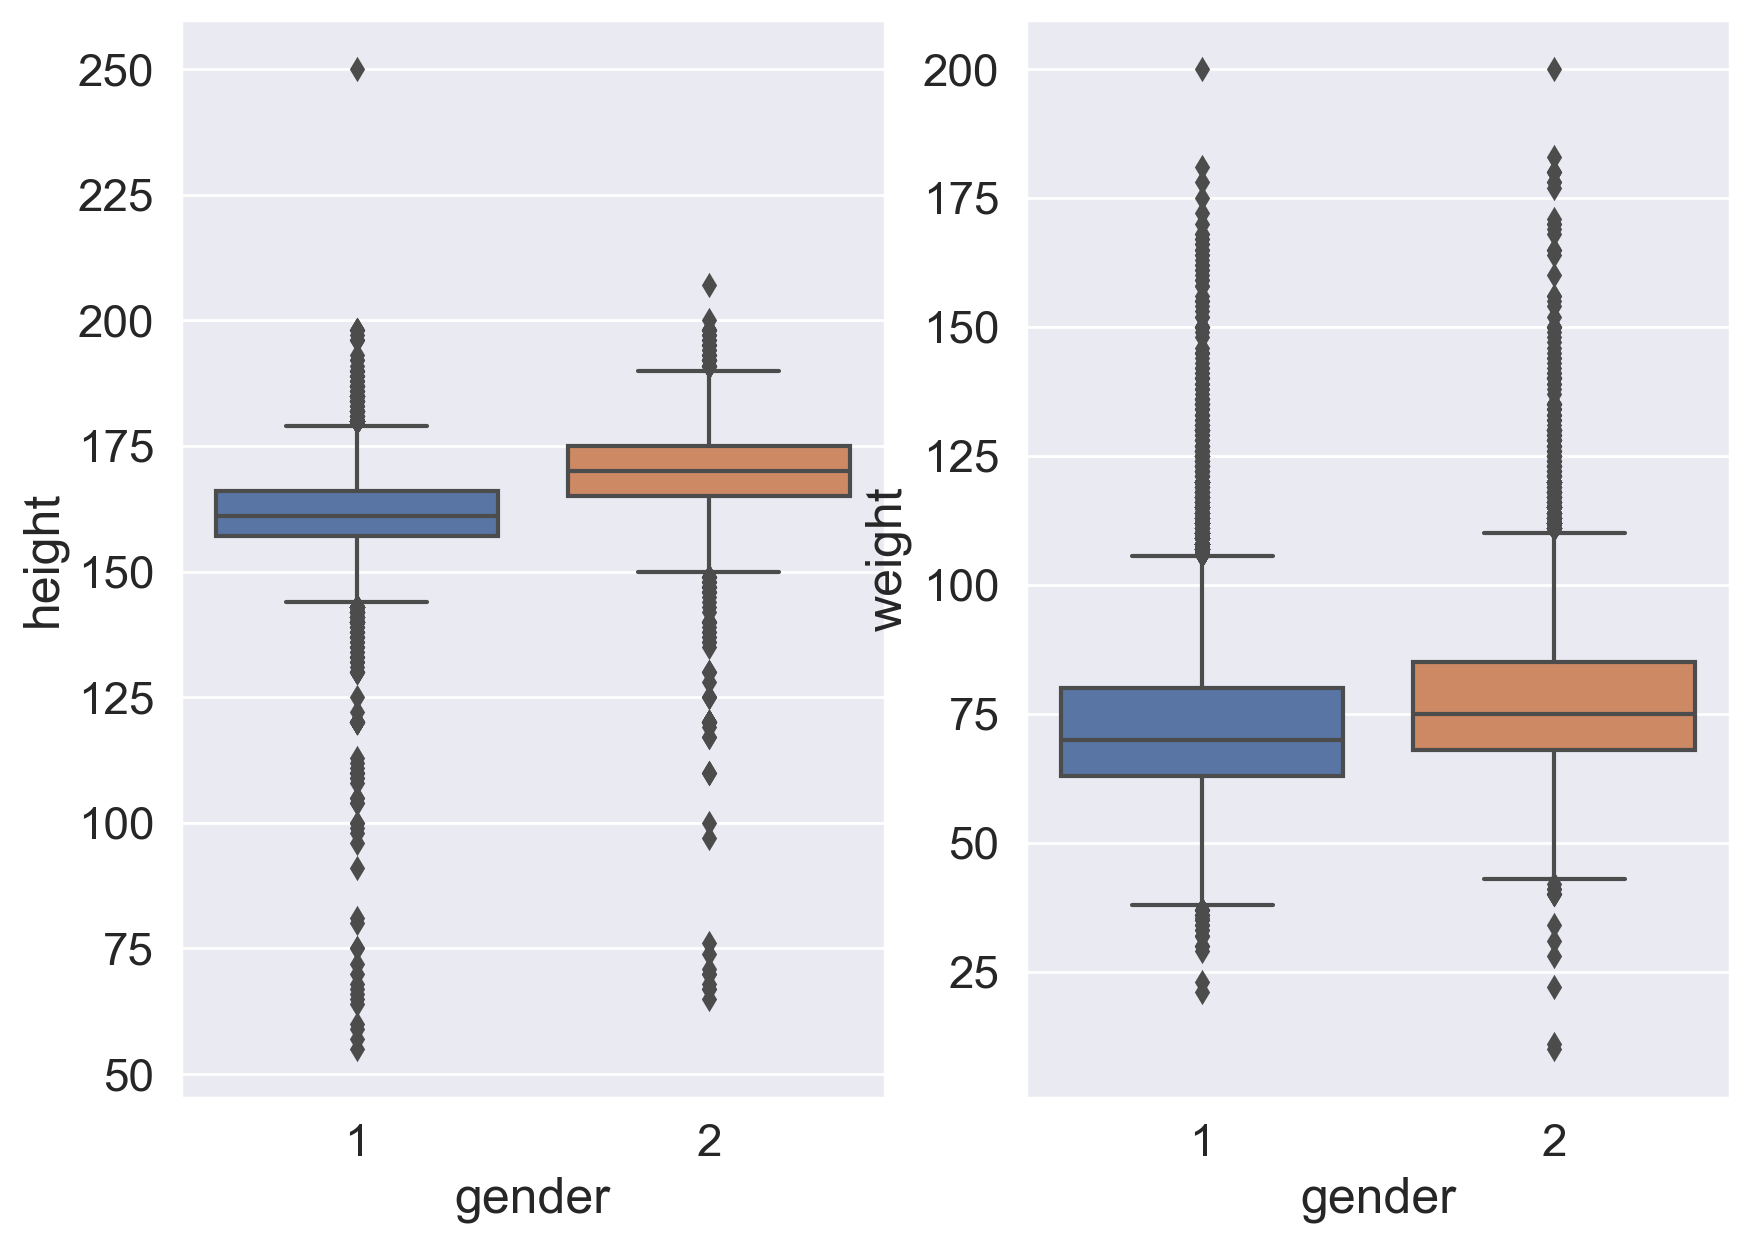

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

sns.boxplot(x="gender", y="height", data=df, ax=axes[0])
sns.boxplot(x="gender", y="weight", data=df, ax=axes[1])

#2-male, 1-female

In [7]:
df.set_index(["id"], inplace = True)

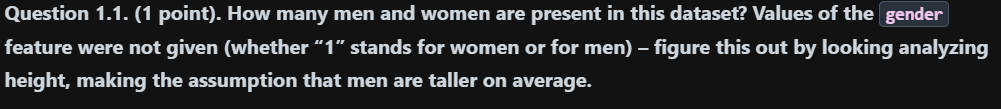

In [8]:

df["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

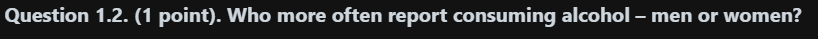

In [9]:


df[df["alco"] == 1].groupby("gender")["alco"].value_counts()
#female

#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
#sns.countplot(x="gender", hue="alco", data=df, ax=axes)

gender  alco
1       1       1161
2       1       2603
Name: count, dtype: int64

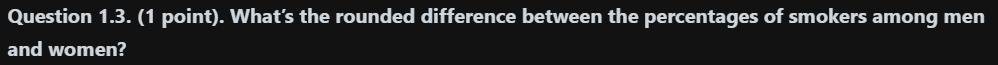

In [10]:

#df.groupby("gender")["smoke"].value_counts()

#perc of smoking men
m = df[(df["gender"] == 2) & (df["smoke"] == 1)].shape[0] / df[df["gender"] == 2].shape[0]

#perc of smoking women
w = df[(df["gender"] == 1) & (df["smoke"] == 1)].shape[0] / df[df["gender"] == 1].shape[0]

round(abs(m-w),2)*100

20.0

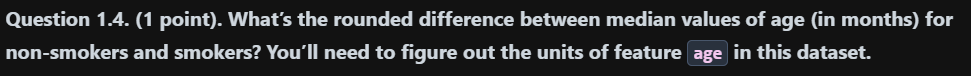

In [11]:


df["age"].describe()[["mean","max","min"]]["mean"] / 365  #age is in days

l = df.groupby(["smoke"])["age"].median()
round(abs(l[0]-l[1])/30,2)

19.9

1.2. Risk maps

In [12]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52


In [13]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]
#4 mmol/l - >1, 5-7 mmol/l ->2, 8 mmol/l -> 3.

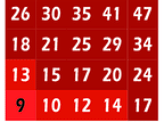

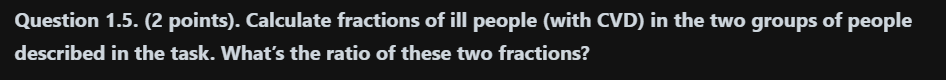

In [14]:

#group 47
r1 =smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)]["cardio"].mean()

#group 9
r2 =smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)]["cardio"].mean()

r1/r2

3.281818181818182

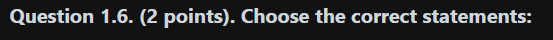

In [15]:
#1.3. Analyzing BMI

#Question 1.6. 

df["BMI"] = df["weight"] / ((df["height"]/100)**2)

#1# 
df["BMI"].median()
#2#
df.groupby(["gender"])["BMI"].describe()["mean"]
#3#
df[(df["alco"]==0) & (df["cardio"]==0)]["BMI"] # healthy
df[(df["alco"]==1) & (df["cardio"]==1)]["BMI"] # ill
#4#
df.groupby(["gender", "alco", "cardio"])["BMI"].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

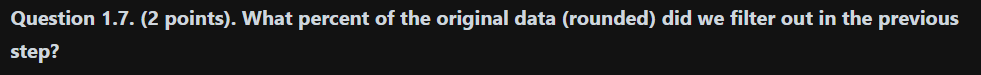

In [16]:
#1.4. Cleaning data

#systolic top
data = df[
    (df["ap_hi"]>= df["ap_lo"])
    & (df["height"] >= df["height"].quantile(0.025))
    & (df["height"] <= df["height"].quantile(0.975))
    & (df["weight"] >= df["weight"].quantile(0.025))
    & (df["weight"] <= df["weight"].quantile(0.975))
]

#1.7#
round((df.shape[0]-data.shape[0])/df.shape[0] * 100)



10

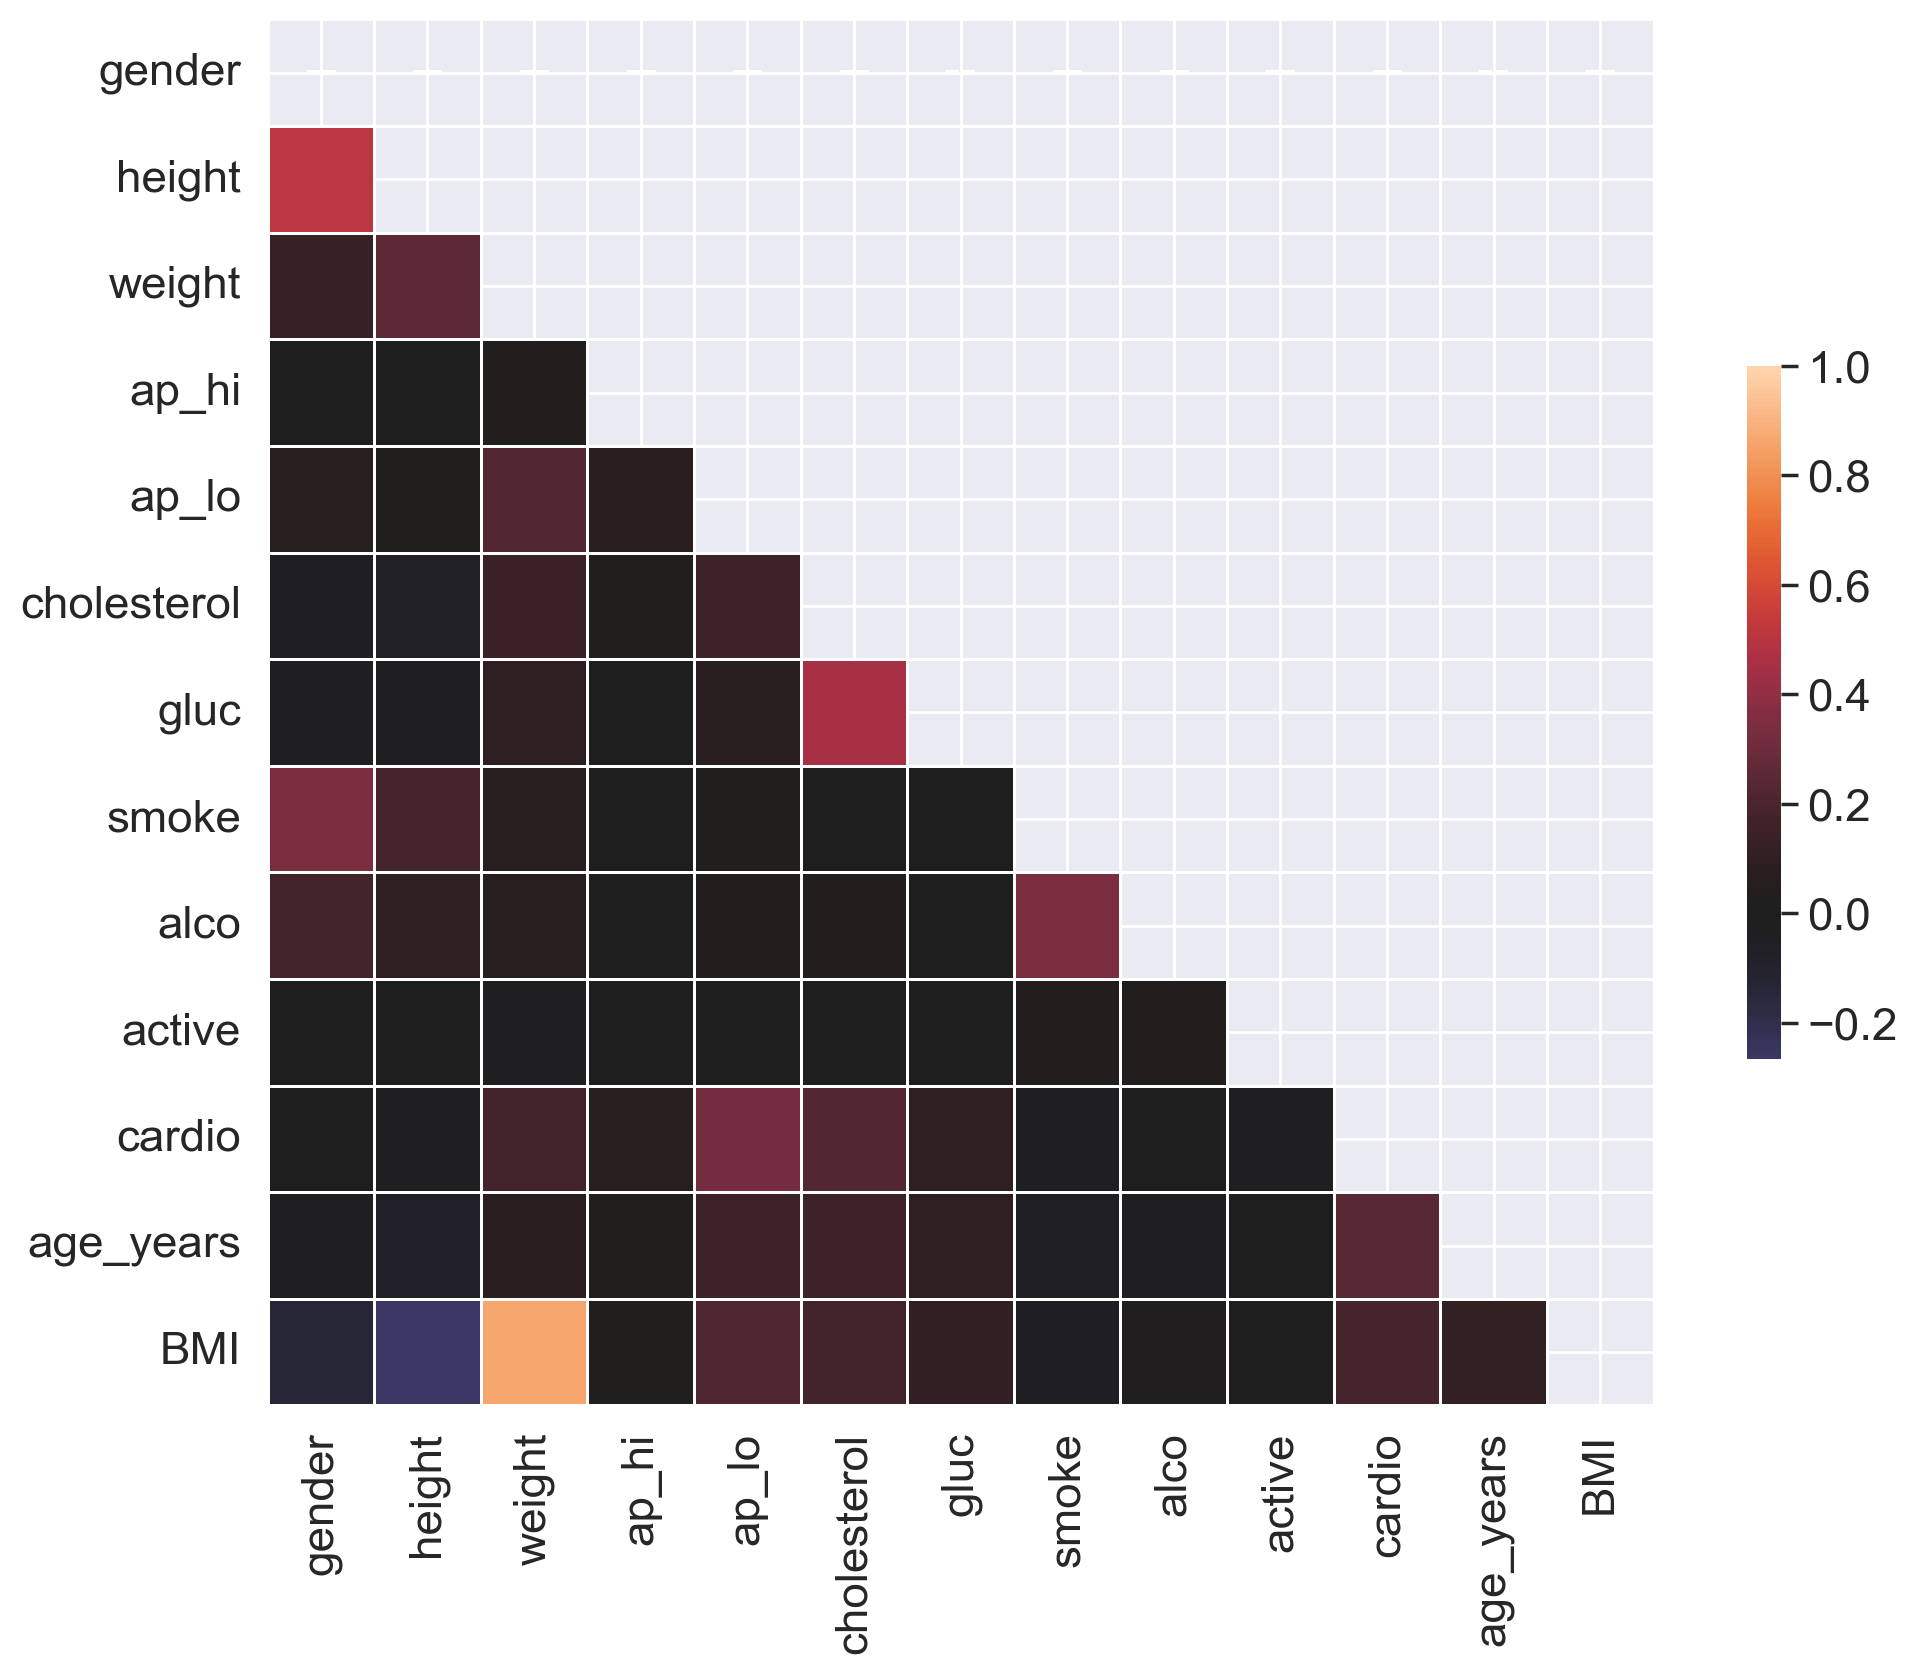

In [17]:
#Part 2. Visual data analysis

new = data.iloc[:,1:]
new

corr =  new.corr(method = 'pearson')
#sns.heatmap(corr)

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);


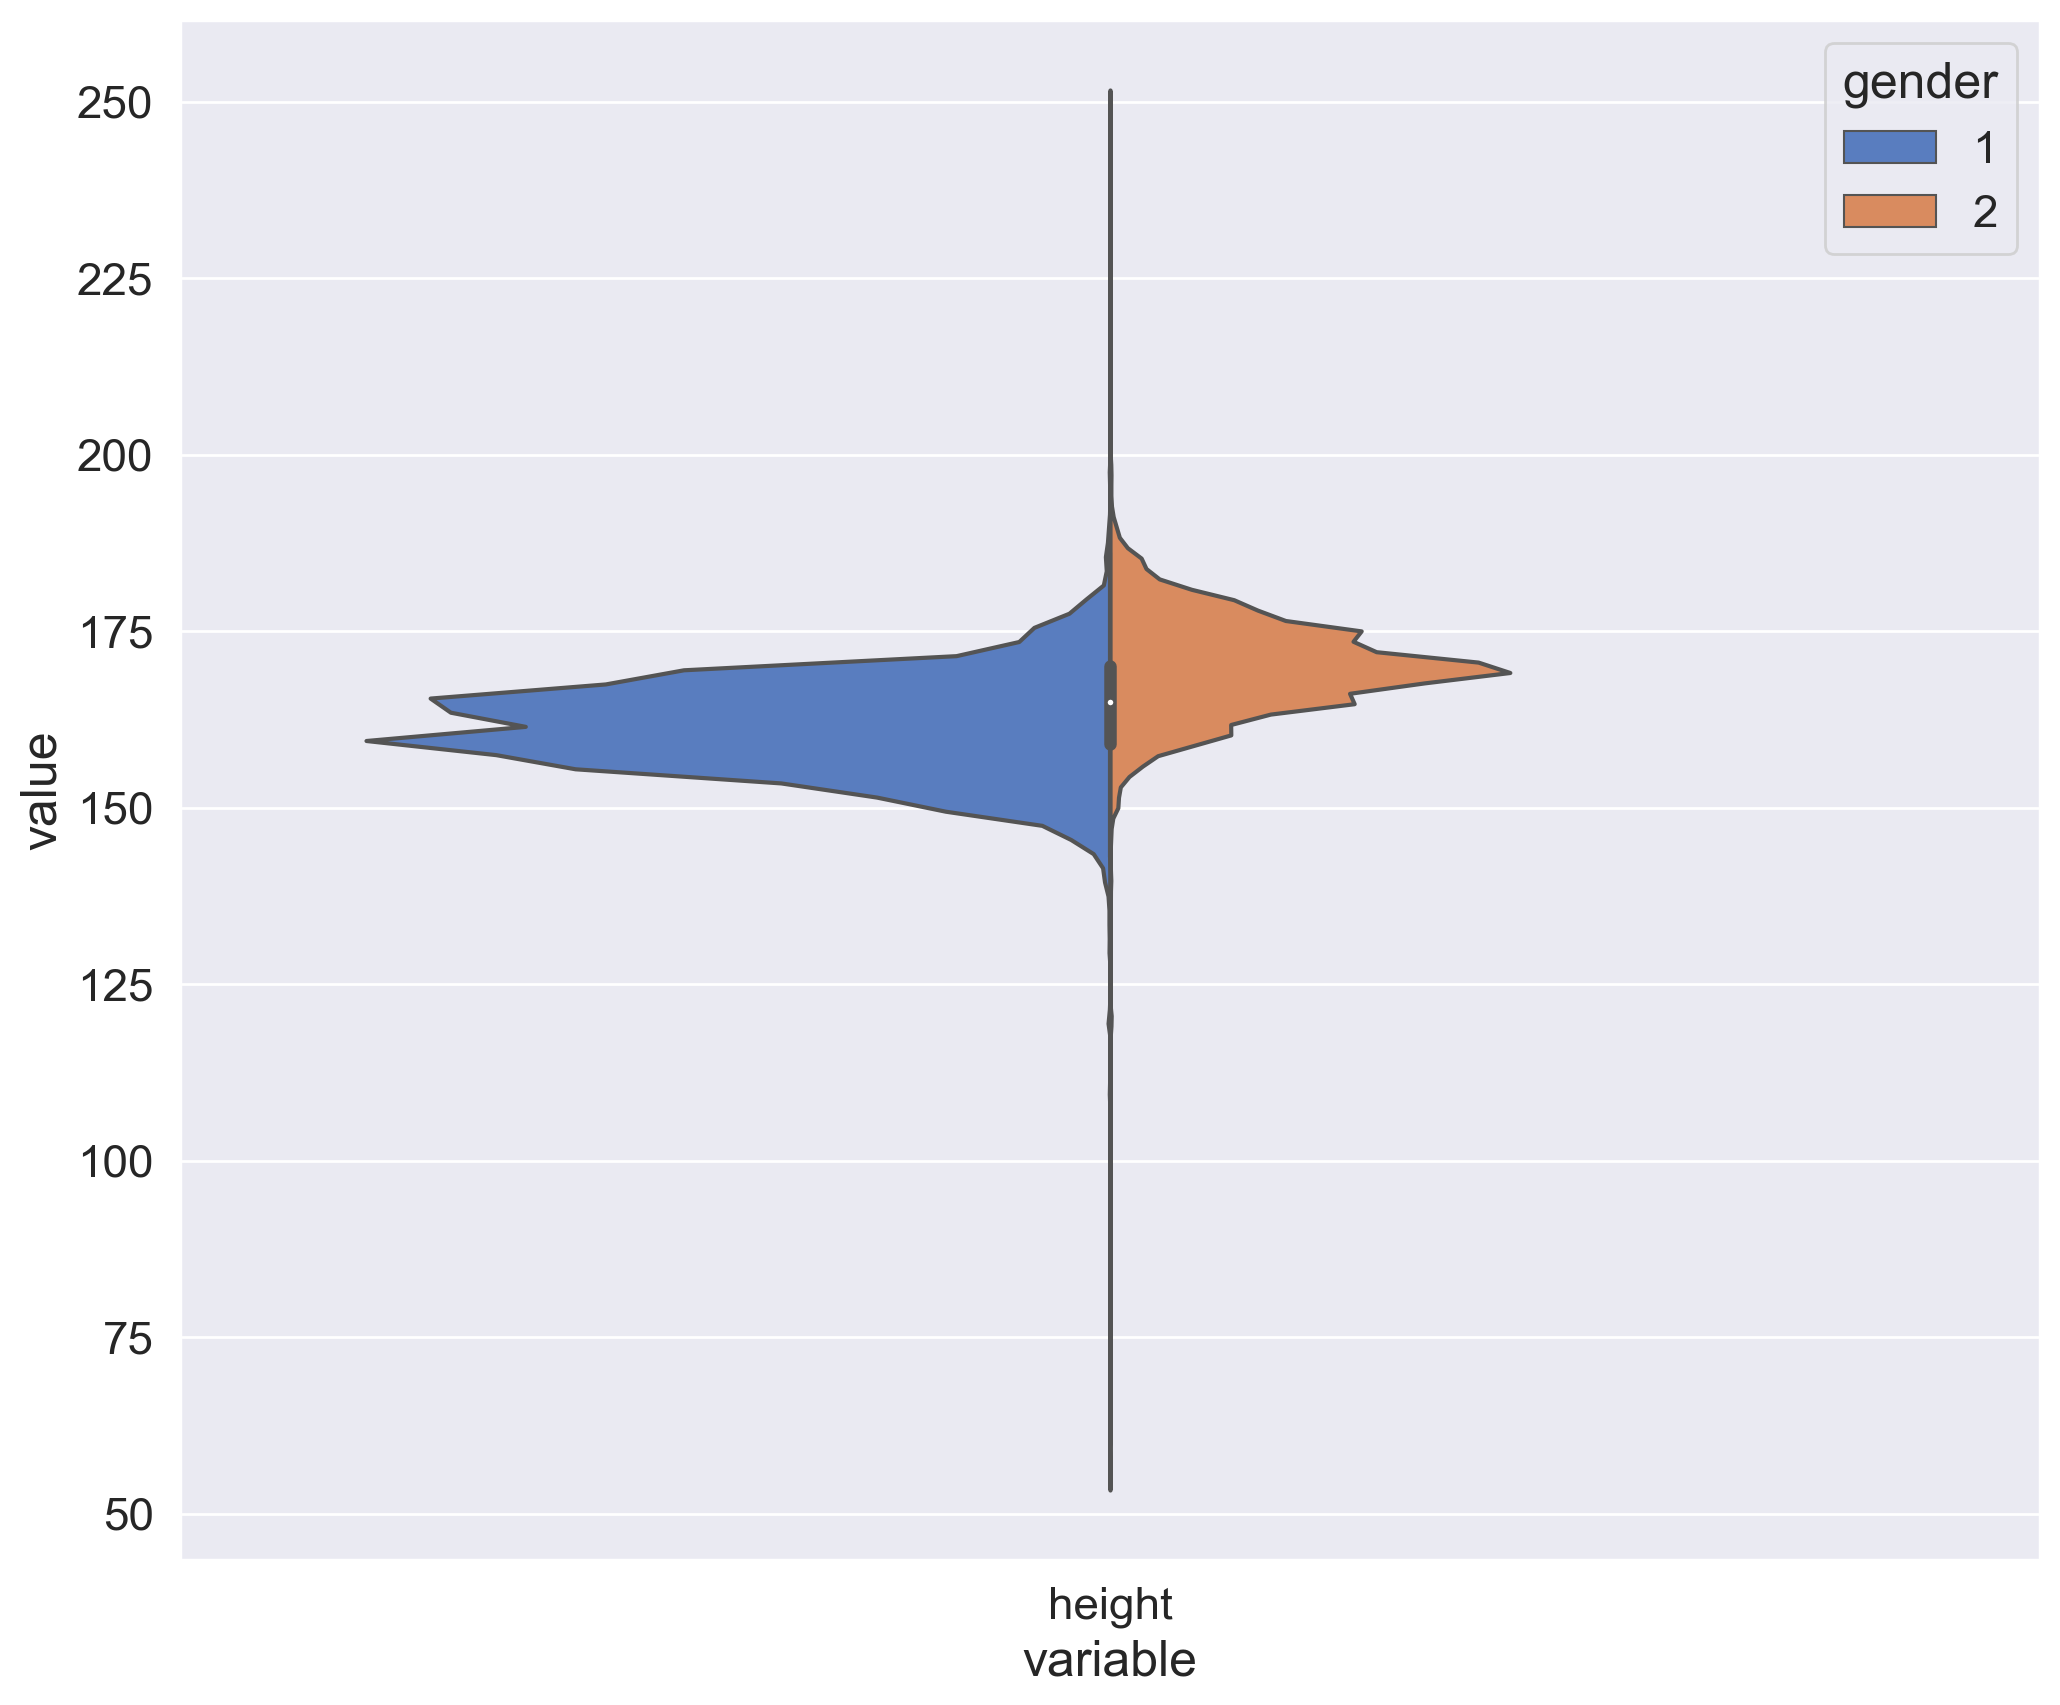

In [18]:
#2.2. Height distribution of men and women

df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

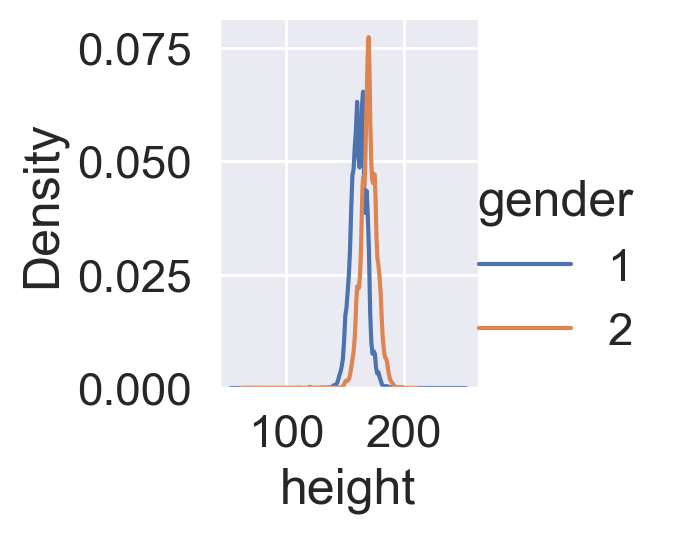

In [19]:
sns.FacetGrid(df, hue="gender").map(sns.kdeplot, "height").add_legend();

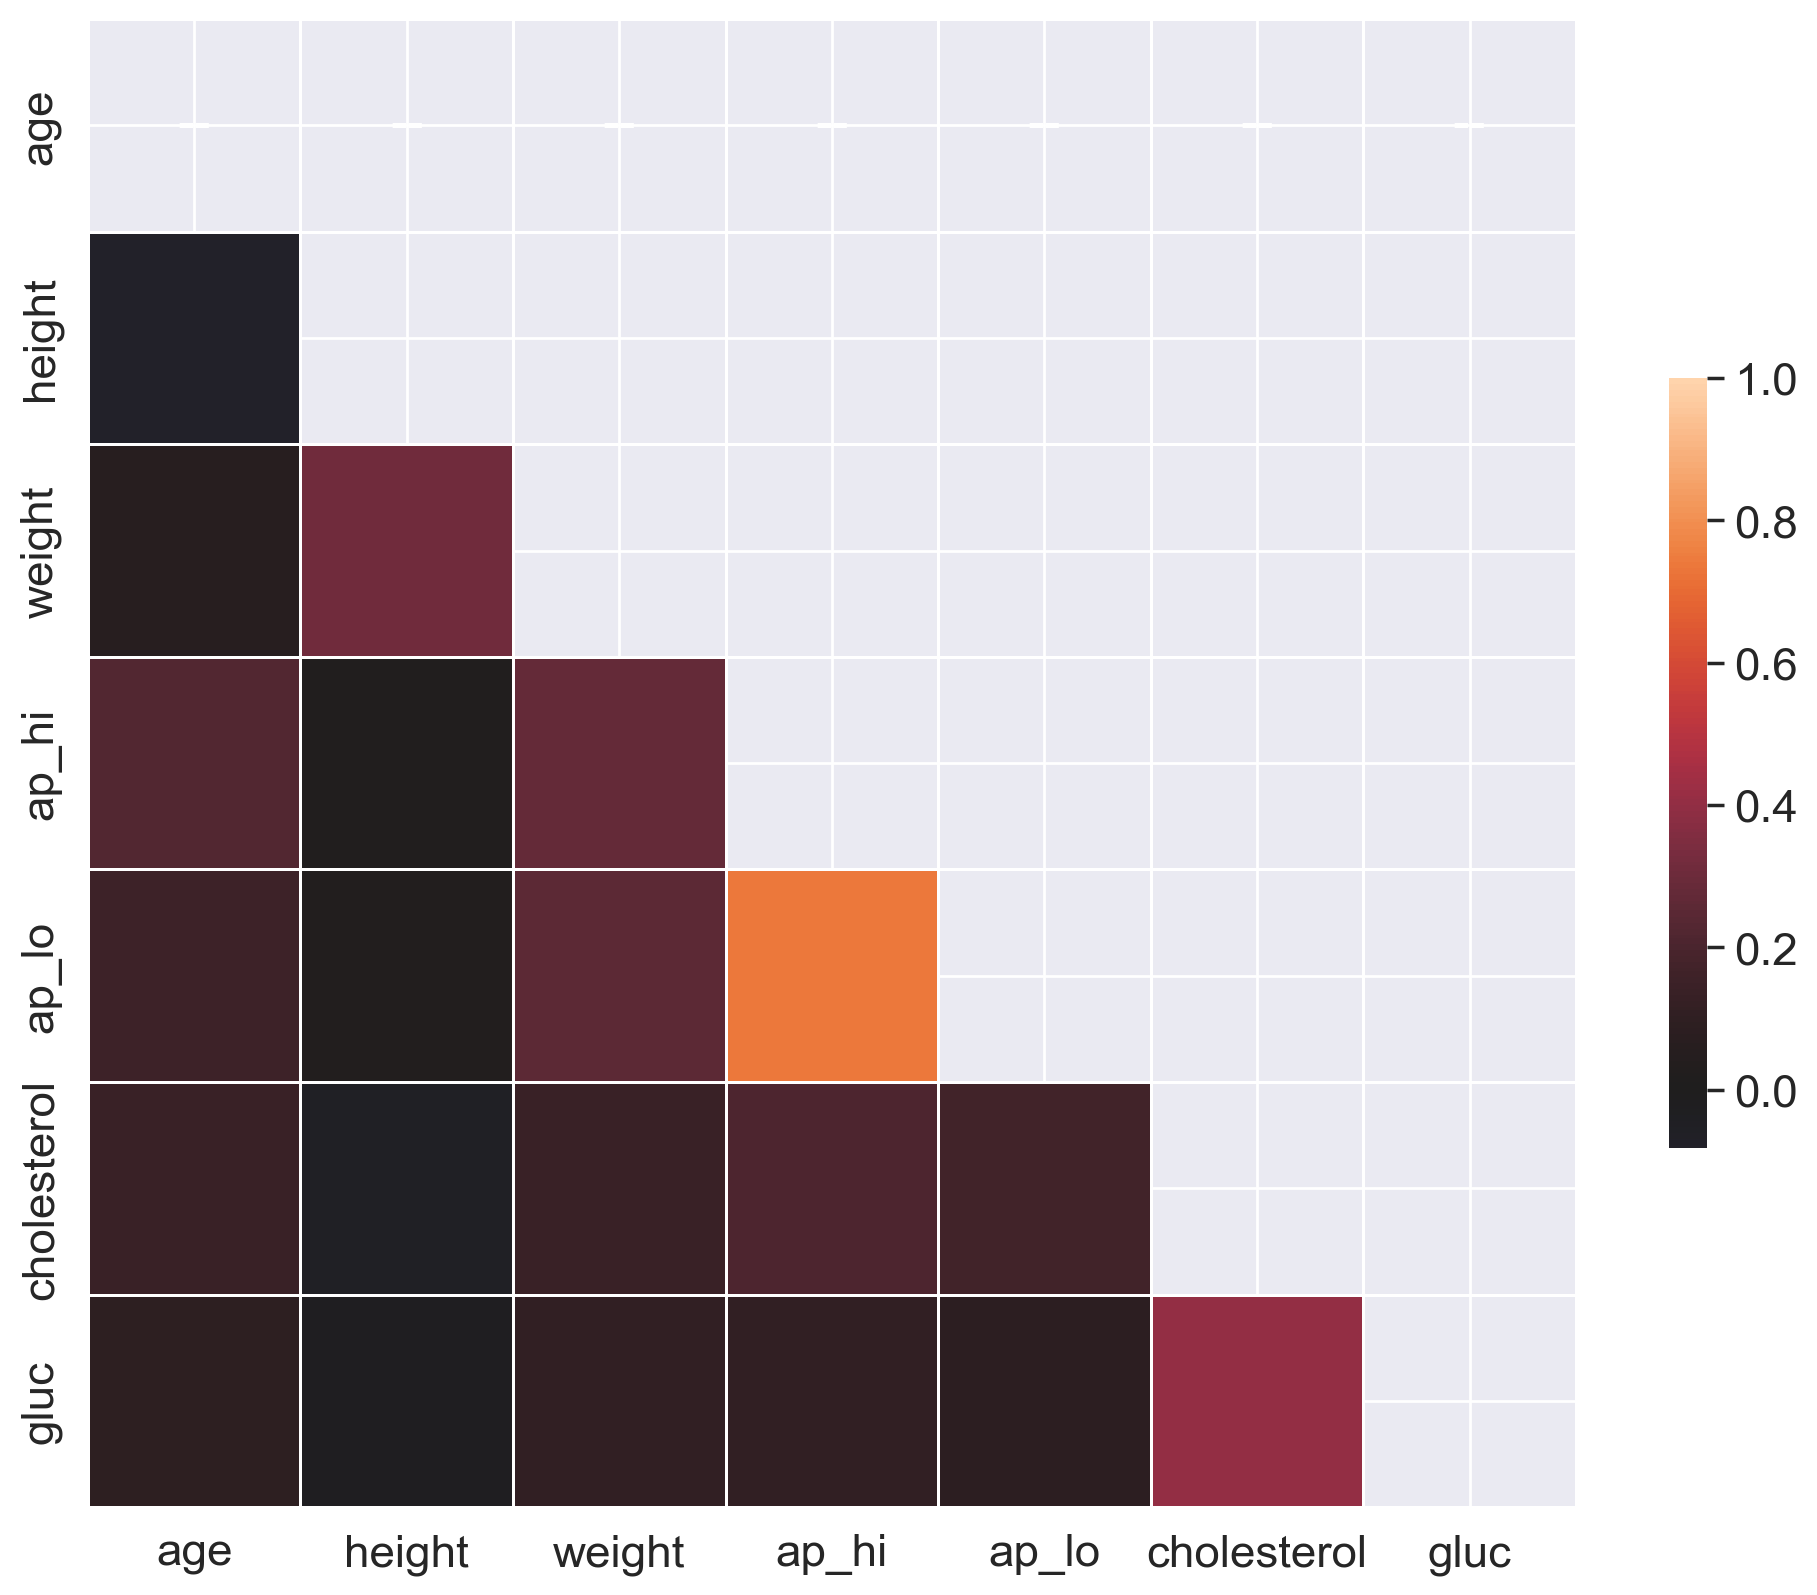

In [20]:
#2.3. Rank correlation

# Calculate the correlation matrix
corr = df[
    [ "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

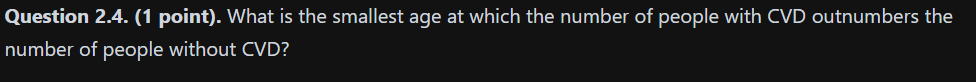

<Axes: xlabel='age_years', ylabel='count'>

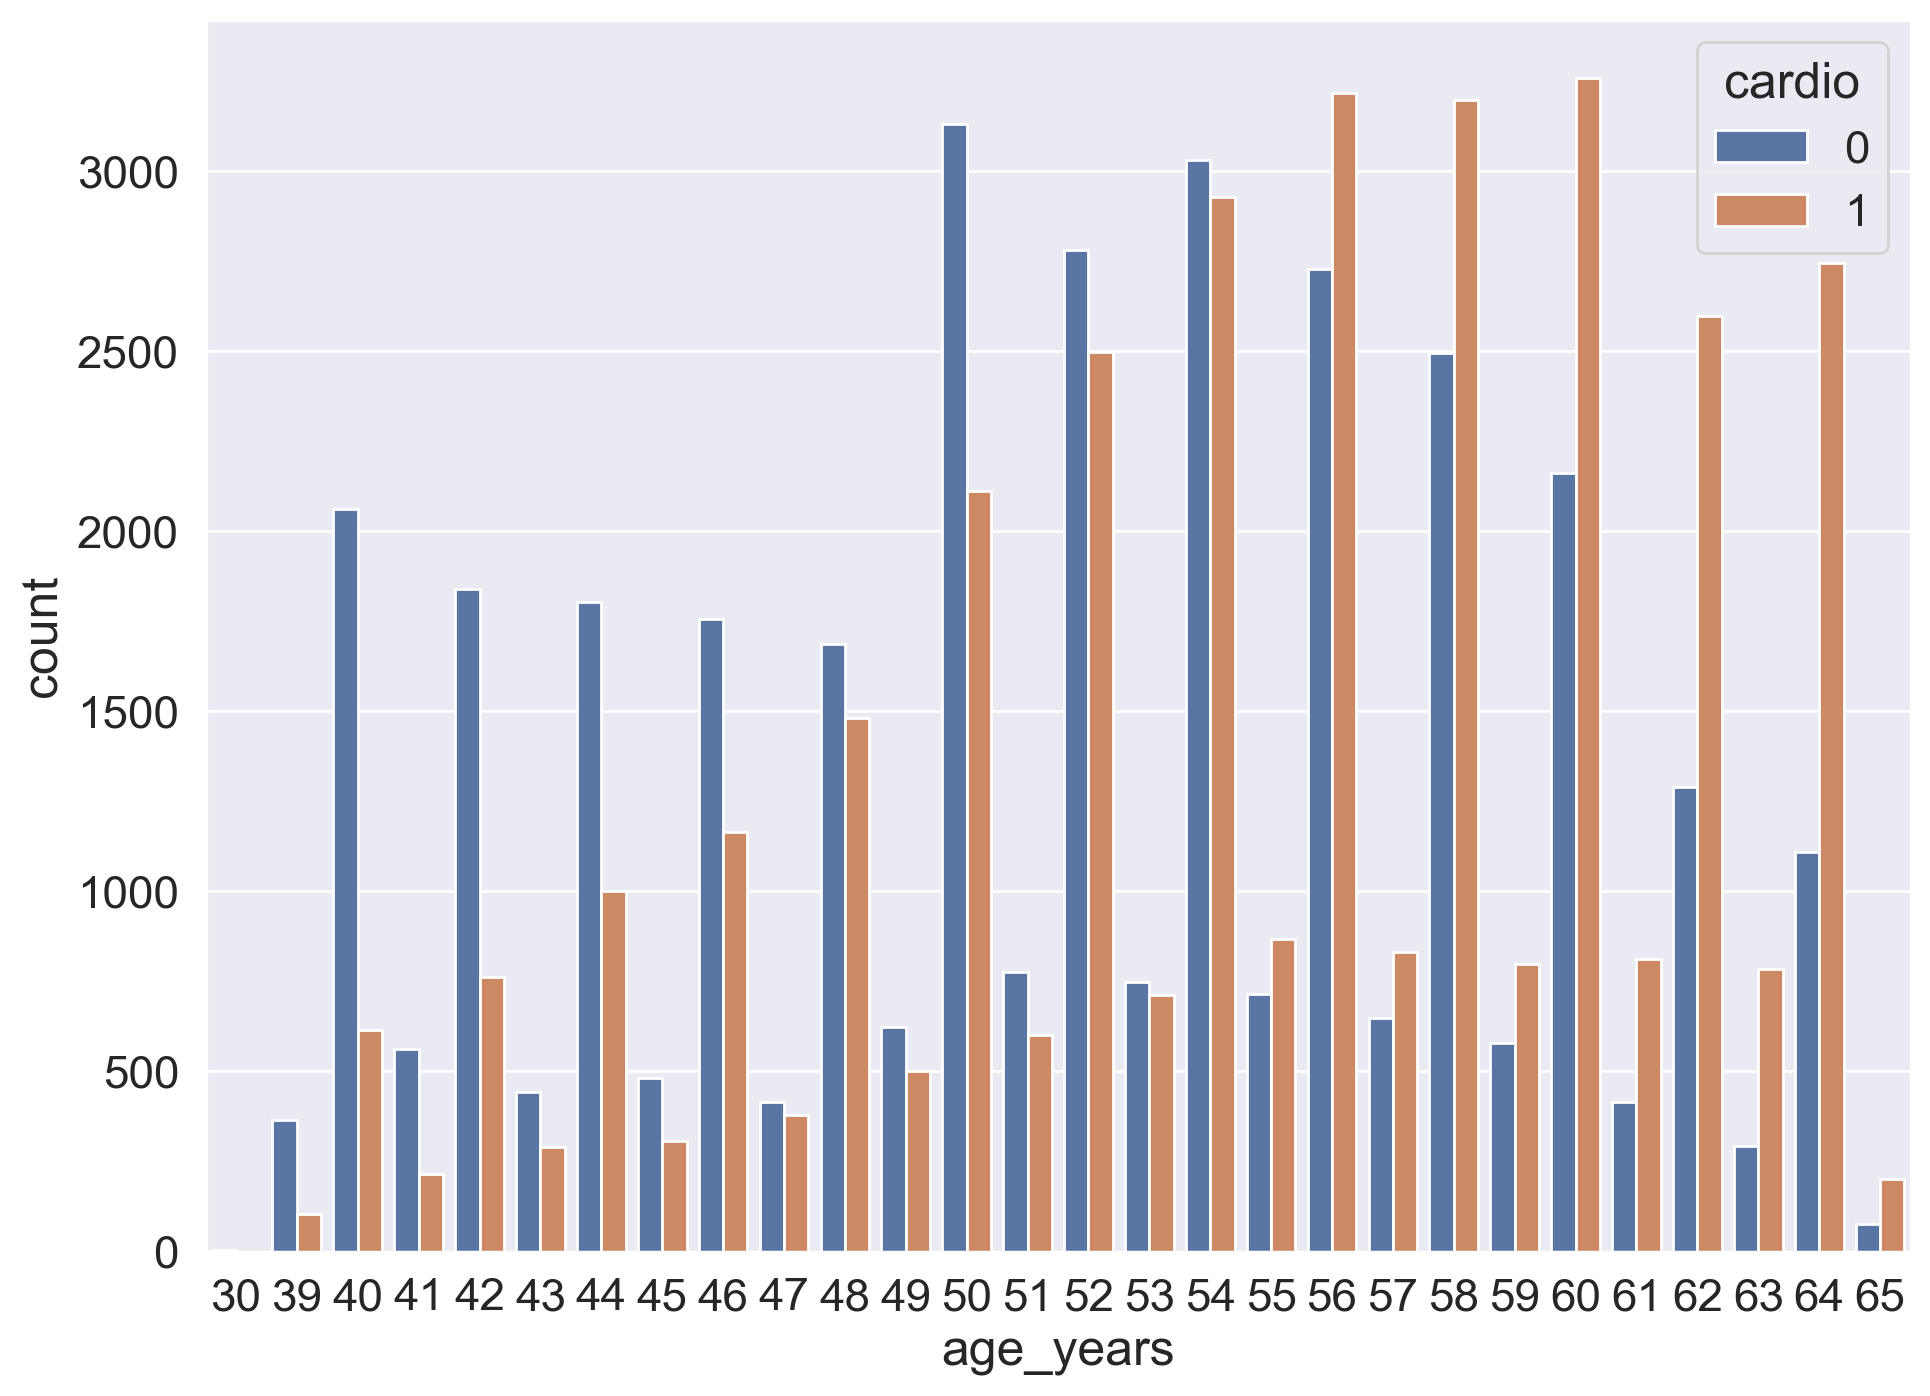

In [21]:
#2.4. Age

sns.countplot(data = df, x="age_years", hue=df["cardio"].astype("str"))

#Question 2.4. 55